<a href="https://colab.research.google.com/github/zyan0082/GitDemo/blob/main/Jason_StockProtfolioOptimization(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [ ]:
#Importing and formatting the df
stocks = pd.read_csv('adjprice.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y%m%d')
stocks

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [ ]:
stocks.columns = stocks.columns.str.replace(' US Equity', '')
stocks

,Date,0111145D,0202445Q,0203524D,0226226D,0376152D,0440296D,0544749D,0574018D,0598884D,...,YNR,YRCW,YUM,YUMC,ZBH,ZETHQ,ZION,ZRN,ZTS,ZTS-W
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [ ]:
StartDate = "2017/01/01"
EndDate = "2017/12/31"

Drop the rows which are not in the period

In [ ]:
stocks_short = stocks[(stocks["Date"] >= StartDate) & (stocks["Date"] <= EndDate)]
stocks_short.dropna(axis=1,inplace=True)
stocks_short

,Date,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,...,XOM,XRAY,XRX,XYL,YRCW,YUM,YUMC,ZBH,ZION,ZTS
8517,2017-01-01,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
8518,2017-01-02,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
8519,2017-01-03,45.7644,28.83,45.4647,170.016,112.6210,57.9530,79.7908,112.36,37.4777,...,84.0728,57.9447,25.9213,48.4421,13.54,61.3191,25.9769,101.8748,41.9161,52.8910
8520,2017-01-04,46.3649,30.26,45.8575,171.411,112.4949,58.7701,81.7708,115.74,37.7752,...,83.1478,58.4191,26.8994,49.1641,14.14,61.5422,26.3530,102.8115,42.5179,53.4042
8521,2017-01-05,45.8137,30.65,45.0621,171.291,113.0670,59.2158,80.8243,114.81,38.1016,...,81.9083,57.6580,26.7866,48.7153,13.85,61.7459,26.7193,103.4720,41.8287,53.2266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2017-12-27,66.6991,51.84,51.8983,99.640,168.0766,94.4085,91.0247,190.42,56.4357,...,80.5614,65.5450,28.4178,67.4304,14.71,81.3177,39.8837,119.1535,49.7199,72.0207
8878,2017-12-28,66.8478,54.14,51.9578,99.580,168.5495,94.1198,91.0149,190.55,56.4259,...,80.6766,66.0296,28.6317,67.4502,14.54,81.5841,40.3700,120.9920,50.3376,71.9611
8879,2017-12-29,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131
8880,2017-12-30,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131


Store the columns names and:

calculate the return as (FinalPrice-StartPrice)/StartPrice.
calculate the volatility as StandardDeviation/StartPrice.
The Sharpe Ratio (should have some no risk return to compare this against) then gives an indication of the performance of the stock over the period of interest.

In [ ]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that

stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1

# calcuate standard variation of time series and divide by first price
stocks_var = stocks_short.iloc[:,1:].std()/stocks_short.iloc[0,1:]
sharpe_ratio = stocks_return/stocks_var # return divided by variance

Plot Volatility vs Return and a reference line to give an indication of the best performing stocks. Best performing stocks are in contact with line through the origin with largest slope.

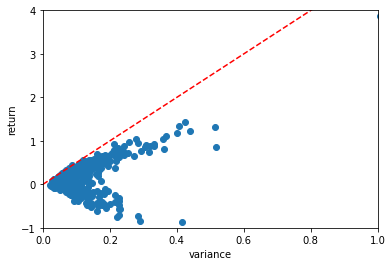

In [ ]:
plt.scatter(stocks_var,stocks_return)
plt.plot([0,1],[0,5],ls='--', color = "red") # reference line of return = 5*std
plt.xlabel('variance')
plt.ylabel('return')
plt.xlim([.0,1])
plt.ylim([-1,4]);

Plot histograms of the Return, Volatility and Sharpe Ratio. The majority of stocks have a Sharpe Ratio > 2, which is indicative of good performance.

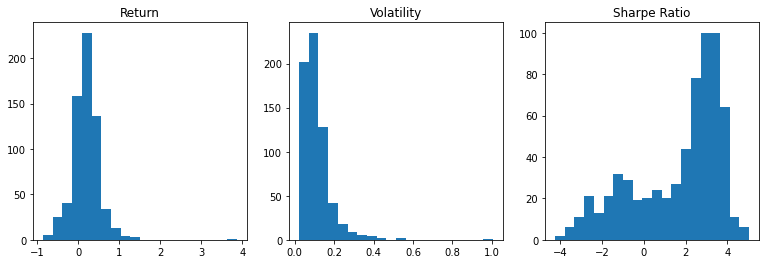

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_var,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio');

In [ ]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head(20)

LM       5.038678
LOW      4.863452
TIF      4.843593
CLX      4.680904
CSX      4.671439
EMR      4.671248
ILMN     4.344673
AA       4.313605
ARNC     4.277256
HD       4.267495
TKR      4.262052
NSC      4.233976
RSG      4.195317
LEN      4.193245
PH       4.160009
NWS       4.12101
MAS      4.116292
LEN/B    4.096175
UNP      4.094454
DRI       4.02907
dtype: object

# MODELLING

Create a random portfolio of NSTOCKS stocks, which all have positive return for the period of interest.

In [ ]:
NSTOCKS = 20
# drop all the stocks with negative return and take a random sample of the remainder
stocks_return = stocks_return[stocks_return > 0].sample(n=NSTOCKS)

Copy the stock timeseries for each stock in the portfolio into a new dataframe.

In [ ]:
# create a new dataframe with the first column being the dates
portfolio = pd.DataFrame(stocks_short['Date'],columns=['Date'])
for col in stocks_short.columns: # go through all the columns in our original data frame
    if col in stocks_return.index: # check if this column is in the names for our random sample
        portfolio = pd.concat([portfolio,stocks_short[col]],axis=1) # if so, add the stock prices to the new dataframe

portfolio

,Date,AMG,ANET,AXP,BKNG,BWA,CNC,CSX,DTE,GPN,...,IT,MDT,O,R,TEX,TMK,TSS,UNP,VLO,WFM
8517,2017-01-01,143.4669,96.77,71.8598,1466.06,38.5151,56.51,35.0164,93.1054,69.3599,...,101.07,68.5242,52.8116,70.4585,30.9298,72.6578,48.4725,99.7835,63.5521,30.3495
8518,2017-01-02,143.4669,96.77,71.8598,1466.06,38.5151,56.51,35.0164,93.1054,69.3599,...,101.07,68.5242,52.8116,70.4585,30.9298,72.6578,48.4725,99.7835,63.5521,30.3495
8519,2017-01-03,143.9507,97.06,73.0917,1477.57,39.1303,58.31,34.9774,92.8218,70.4491,...,99.86,67.9277,52.8208,71.3198,31.3320,72.8154,50.8551,98.6671,65.5056,30.4778
8520,2017-01-04,147.5250,101.73,74.2899,1487.29,39.8627,60.25,35.6986,93.0676,73.0772,...,101.79,68.5626,53.6110,72.0486,31.8911,73.6741,51.7251,99.2638,63.1521,30.5271
8521,2017-01-05,145.7181,101.94,73.3742,1503.70,39.8139,60.15,36.0494,93.1904,73.3670,...,90.56,68.1394,55.0534,71.3766,31.0279,73.2201,51.8833,98.2918,62.9568,30.0535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2017-12-27,203.0511,239.50,97.7073,1757.88,51.0227,103.02,54.5708,105.9877,100.3052,...,123.97,79.9575,54.2609,82.4740,48.0783,90.0255,78.9629,134.2002,89.1874,41.9900
8878,2017-12-28,204.8765,240.64,98.2692,1764.09,51.5471,102.90,54.4323,106.8357,100.2952,...,123.89,79.9969,54.6435,82.4255,47.9793,90.4921,79.3612,133.0188,89.3423,41.9900
8879,2017-12-29,203.6265,235.58,97.8848,1737.74,50.5478,100.88,54.4422,106.6895,100.2152,...,123.15,79.4166,54.7516,81.6495,47.7122,90.0454,78.7538,132.0147,88.9648,41.9900
8880,2017-12-30,203.6265,235.58,97.8848,1737.74,50.5478,100.88,54.4422,106.6895,100.2152,...,123.15,79.4166,54.7516,81.6495,47.7122,90.0454,78.7538,132.0147,88.9648,41.9900


Calculate and plot the correlation of the returns in the portfolio. This is important as we need a diversified portfolio, so the stocks in the portfolio should have weak correlation.

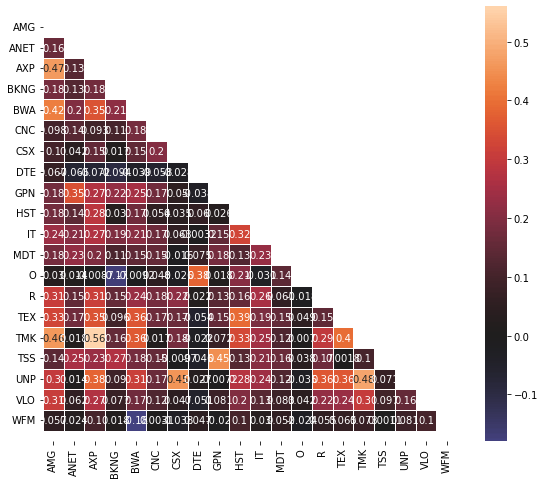

In [ ]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = portfolio.diff(axis=0, periods=1).corr()
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

We can get an idea of the risk and return for the portfolio by randomly calculating the stock weights, and then calculate the risk and return for the portfolio and then plotting these. From Modern Portfolio Theory on Wikipedia, the variance of the portfolio is defined as

σ2p=wT×Corr×w,

where  w  is the vector of the weights and  Corr  is the correlation matrix for the portfolio. The risk is then

σp=(σ2p)1/2.

The return is defined as (FinalValue-StartValue)/StartValue. We normalize the weights so that StartValue=1, and thefore the return is FinalValue-1.

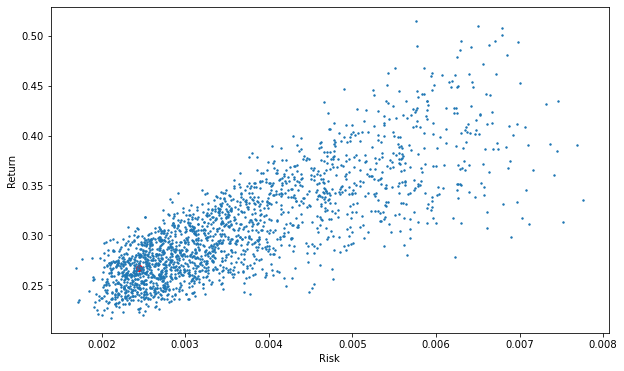

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:] # store the final stock prices
max_returnrisk = 0
for i in range(NSAMP): # loop over all the samples
    weight = np.random.rand(NSTOCKS)# generates weights in the range [0,1] for all the stocks
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = weight.T @ Ro
    w = weight/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
    if (Pf-1)/risk >= max_returnrisk:
        max_returnrisk = (Pf-1)/risk
        weights = weight / weight.sum()
        risk = risk
        max_return = Pf-1
# plot risk vs returns and add axis labels
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(risk,max_return,color='r')
plt.scatter(result_array[0,:],result_array[1,:], s=2)
plt.xlabel('Risk')
plt.ylabel('Return');

In [ ]:
weights = pd.DataFrame(weights*100)

returns = ((R-Ro)/Ro).to_frame()
returns = returns.reset_index()

stock_weights = pd.merge(returns, weights, left_index=True, right_index=True)
stock_weights = stock_weights.set_index(['index'])
stock_weights.columns = ['return (%)', 'weight (%)']
stock_weights = stock_weights['weight (%)']
stock_weights = pd.DataFrame(stock_weights)

In [ ]:
stock_weights

,weight (%)
index,
AMG,4.892556
ANET,11.750676
AXP,0.527984
BKNG,12.258705
BWA,8.391066
CNC,1.396585
CSX,4.139104
DTE,11.621939
GPN,0.680990


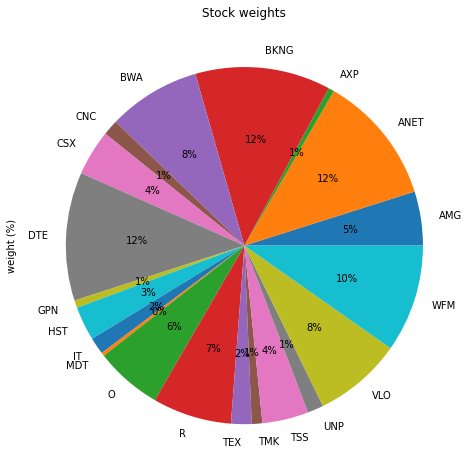

In [ ]:
plt.rcParams["figure.figsize"] = (8,20)

stock_weights['weight (%)'].plot(kind='pie', autopct='%1.0f%%',
                                title='Stock weights');

In [ ]:
SR = sharpe_ratio_sorted.to_frame()
SR = SR.rename(columns={0:"Sharpe Ratio"})
SR = SR.sort_index()

In [ ]:
stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1
stocks_return = stocks_return.to_frame()

In [ ]:
GICS = pd.read_csv('table-1.csv')
GICS = GICS.set_index('Symbol')
GICS

,Name,GICS Sector,GICS Sub-Industry
Symbol,,,
A,Agilent Technologies,Health Care,Health Care Equipment
AAL,American Airlines Group,Industrials,Airlines
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
ABBV,AbbVie,Health Care,Pharmaceuticals
...,...,...,...
YUM,Yum! Brands,Consumer Discretionary,Restaurants
ZBH,Zimmer Biomet,Health Care,Health Care Equipment
ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments


In [ ]:
sectors = pd.merge(GICS, SR, left_index=True, right_index=True)
sectors.reset_index(inplace=True)
sectors = sectors.rename(columns = {"index":"Symbol"})

In [ ]:
sectors.groupby('GICS Sector').count()


,Symbol,Name,GICS Sub-Industry,Sharpe Ratio
GICS Sector,,,,
Communication Services,20,20,20,20
Consumer Discretionary,49,49,49,49
Consumer Staples,32,32,32,32
Energy,18,18,18,18
Financials,56,56,56,56
Health Care,51,51,51,51
Industrials,59,59,59,59
Information Technology,56,56,56,56
Materials,23,23,23,23


In [ ]:
SR.reset_index(inplace=True)
SR = SR.rename(columns={'index':"Symbol"})

In [ ]:
chosen_stocks = sectors.groupby(['GICS Sector']).max()
chosen_stocks = chosen_stocks[['Sharpe Ratio']]
chosen_stocks.reset_index(inplace=True)
chosen_stocks = chosen_stocks.merge(SR, how='inner')
chosen_stocks

,GICS Sector,Sharpe Ratio,Symbol
0,Communication Services,4.12101,NWS
1,Consumer Discretionary,4.863452,LOW
2,Consumer Staples,4.680904,CLX
3,Energy,3.212874,MPC
4,Financials,3.959153,RJF
5,Health Care,4.344673,ILMN
6,Industrials,4.671439,CSX
7,Information Technology,3.9612,CSCO
8,Materials,3.944215,SHW
9,Real Estate,3.691926,WY


In [ ]:
new_portfolio = stocks_short[['Date','NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY', 'AWK']]
new_portfolio

,Date,NWS,LOW,CLX,MPC,RJF,ILMN,CSX,CSCO,SHW,WY,AWK
8517,2017-01-01,11.4645,68.4595,113.783,47.7104,67.8651,128.04,35.0164,28.3163,263.822,28.2110,69.4426
8518,2017-01-02,11.4645,68.4595,113.783,47.7104,67.8651,128.04,35.0164,28.3163,263.822,28.2110,69.4426
8519,2017-01-03,11.7074,68.2959,114.731,50.1552,68.2668,131.13,34.9774,28.6161,269.516,28.4641,69.3371
8520,2017-01-04,11.9017,69.1237,115.594,48.5538,70.8435,135.18,35.6986,28.4460,271.342,28.7172,69.8745
8521,2017-01-05,11.9017,68.4114,116.324,48.3737,72.0975,134.56,36.0494,28.5122,271.126,29.0173,69.9897
...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2017-12-27,16.4244,90.4348,145.195,64.7332,88.5616,215.46,54.5708,37.4226,406.746,34.1492,88.9522
8878,2017-12-28,16.4244,91.1712,144.913,64.7138,88.7394,217.52,54.4323,37.4517,409.592,34.3048,89.7160
8879,2017-12-29,16.3750,91.2497,144.660,64.3044,88.2158,218.49,54.4422,37.1703,406.588,34.3048,89.5887
8880,2017-12-30,16.3750,91.2497,144.660,64.3044,88.2158,218.49,54.4422,37.1703,406.588,34.3048,89.5887


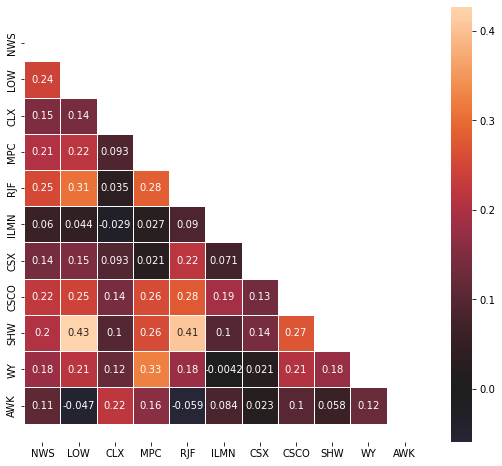

In [ ]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = new_portfolio.diff(axis=0, periods=1).corr()
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

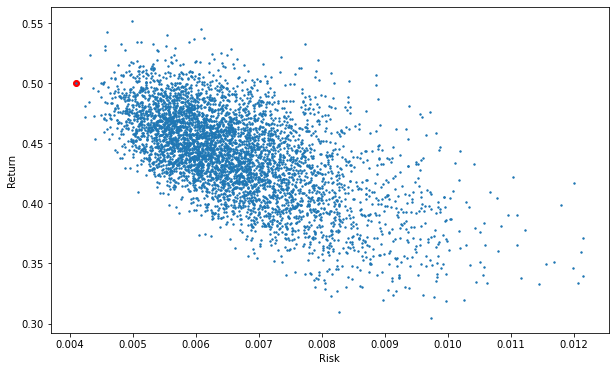

In [ ]:
NSAMP = 5000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = new_portfolio.iloc[0,1:] # store the initial stock prices
R = new_portfolio.iloc[-1,1:] # store the final stock prices
max_returnrisk = 0
for i in range(NSAMP): # loop over all the samples
    weight = np.random.rand(11)# generates weights in the range [0,1] for all the stocks
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = weight.T @ Ro
    w = weight/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
    if (Pf-1)/risk >= max_returnrisk:
        max_returnrisk = (Pf-1)/risk
        weights = weight / weight.sum()
        bestrisk = risk
        max_return = Pf-1
# plot risk vs returns and add axis labels
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(bestrisk,max_return,color='r')
plt.scatter(result_array[0,:],result_array[1,:], s=2)
plt.xlabel('Risk')
plt.ylabel('Return');

In [ ]:
weights = pd.DataFrame(weights*100)

returns = ((R-Ro)/Ro).to_frame()
returns = returns.reset_index()

stock_weights = pd.merge(returns, weights, left_index=True, right_index=True)
stock_weights = stock_weights.set_index(['index'])
stock_weights.columns = ['return (%)', 'weight (%)']
stock_weights = stock_weights['weight (%)']

In [ ]:
stock_weights

index
NWS      0.727781
LOW      4.055770
CLX     18.356967
MPC      5.142226
RJF      3.065953
ILMN    20.674080
CSX      0.090552
CSCO     8.132082
SHW     23.952311
WY      10.921357
AWK      4.880922
Name: weight (%), dtype: float64

In [ ]:
stock_weights_pd = pd.DataFrame(stock_weights)
stock_weights_pd

,weight (%)
index,
NWS,0.727781
LOW,4.055770
CLX,18.356967
MPC,5.142226
RJF,3.065953
ILMN,20.674080
CSX,0.090552
CSCO,8.132082
SHW,23.952311


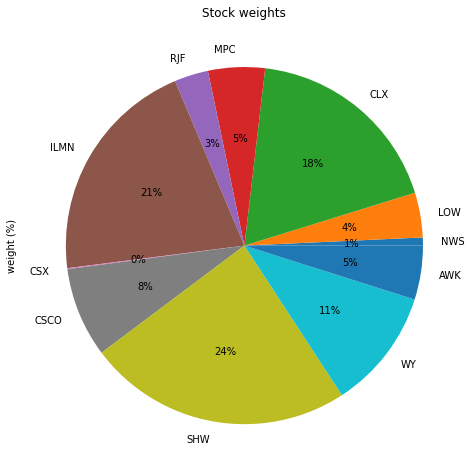

In [ ]:
plt.rcParams["figure.figsize"] = (8,20)

stock_weights_pd['weight (%)'].plot(kind='pie', autopct='%1.0f%%',
                                title='Stock weights');

# Absolute weight

In [ ]:
stock_names = new_portfolio.columns[1:]

In [ ]:
stock_names

Index(['NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY',
       'AWK'],
      dtype='object')

In [ ]:
new_portfolio = new_portfolio.melt(id_vars = 'Date')

In [ ]:
new_portfolio

,Date,variable,value
0,2017-01-01,NWS,11.4645
1,2017-01-02,NWS,11.4645
2,2017-01-03,NWS,11.7074
3,2017-01-04,NWS,11.9017
4,2017-01-05,NWS,11.9017
...,...,...,...
4010,2017-12-27,AWK,88.9522
4011,2017-12-28,AWK,89.7160
4012,2017-12-29,AWK,89.5887
4013,2017-12-30,AWK,89.5887


In [ ]:
start =pd.DataFrame( new_portfolio.groupby(['variable']).first()['value'])

In [ ]:
end = pd.DataFrame( new_portfolio.groupby(['variable']).last()['value'])

In [ ]:
stockname= list(start.index)
new_data= pd.DataFrame({'stock':stockname, 'start_price': list(start['value']),'end_price':list(end['value'])})

In [ ]:
new_data['increasing_rate']= (new_data['end_price']-new_data['start_price'])/new_data['start_price']

In [ ]:
new_data

,stock,start_price,end_price,increasing_rate
0,AWK,69.4426,89.5887,0.290112
1,CLX,113.7830,144.6600,0.271367
2,CSCO,28.3163,37.1703,0.312682
3,CSX,35.0164,54.4422,0.554763
4,ILMN,128.0400,218.4900,0.706420
5,LOW,68.4595,91.2497,0.332900
6,MPC,47.7104,64.3044,0.347807
7,NWS,11.4645,16.3750,0.428322
8,RJF,67.8651,88.2158,0.299870
9,SHW,263.8220,406.5880,0.541145


In [ ]:
stock_weights

index
NWS      0.727781
LOW      4.055770
CLX     18.356967
MPC      5.142226
RJF      3.065953
ILMN    20.674080
CSX      0.090552
CSCO     8.132082
SHW     23.952311
WY      10.921357
AWK      4.880922
Name: weight (%), dtype: float64

In [ ]:
weight=[]
for i in range(len(stock_weights)):
    n=round(stock_weights[i])
    weight.append(n)

In [ ]:
weight

[1, 4, 18, 5, 3, 21, 0, 8, 24, 11, 5]

In [ ]:
money =10000
static_weight = [money*weight[i]//new_data.loc[i,'end_price'] for i in range(len(weight)) ]

In [ ]:
for i in range(len(stock_weights)):
    print('Stock Name: ', new_data.loc[i,'stock'],end=' ')
    print('Buying Number: ', weight[i])

Stock Name:  AWK Buying Number:  1
Stock Name:  CLX Buying Number:  4
Stock Name:  CSCO Buying Number:  18
Stock Name:  CSX Buying Number:  5
Stock Name:  ILMN Buying Number:  3
Stock Name:  LOW Buying Number:  21
Stock Name:  MPC Buying Number:  0
Stock Name:  NWS Buying Number:  8
Stock Name:  RJF Buying Number:  24
Stock Name:  SHW Buying Number:  11
Stock Name:  WY Buying Number:  5


In [ ]:
money=[]
for i in range(len(new_data)):
    a=new_data.loc[i,'end_price']*weight[i]
    money.append(a)

In [ ]:
outcome=0
for i in range(len(money)):
    outcome+=money[i]

In [ ]:
earn=outcome-10000
earn

1073.3900000000012

# Predict

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

KeyError: "None of [Index(['NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY',\n       'AWK'],\n      dtype='object')] are in the [columns]"

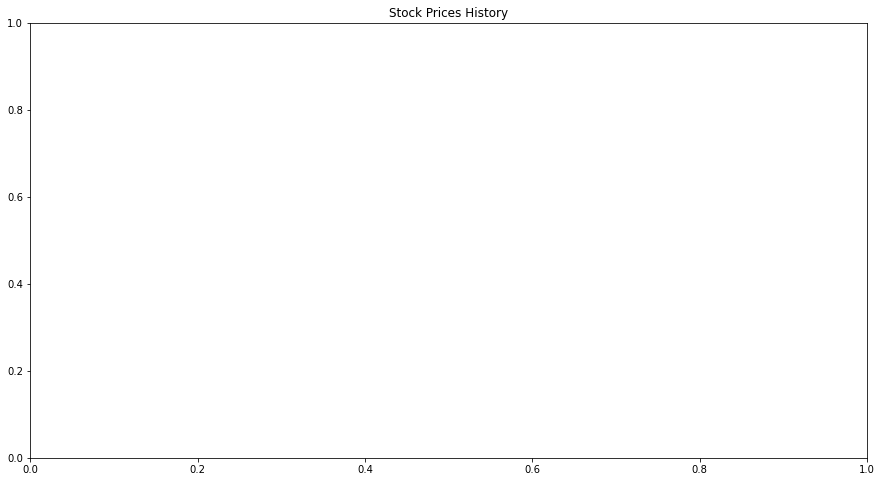

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(new_portfolio[['NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY', 'AWK']])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import math
close_prices = new_portfolio[['NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY', 'AWK']]
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
data = new_portfolio[['NWS', 'LOW', 'CLX', 'MPC', 'RJF', 'ILMN', 'CSX', 'CSCO', 'SHW', 'WY', 'AWK']]
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()